In [1]:
#import data related libraries
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
# import modelling libraries, and statistical libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA as ARIMA

In [2]:
df=pd.read_csv('D:\Crypto\data\BTC-USD_hourly.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\3192603839.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv('D:\Crypto\data\BTC-USD_hourly.csv')


C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\35180152.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].replace(0, np.nan).fillna(method='ffill').fillna(method='bfill')
C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\35180152.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Before Box-Cox Transformation:
KPSS Statistic: 19.657546997561447
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Data is likely non-stationary.

After Box-Cox Transformation:
KPSS Statistic: 20.760528983942418
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Data is likely non-stationary.


C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\35180152.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


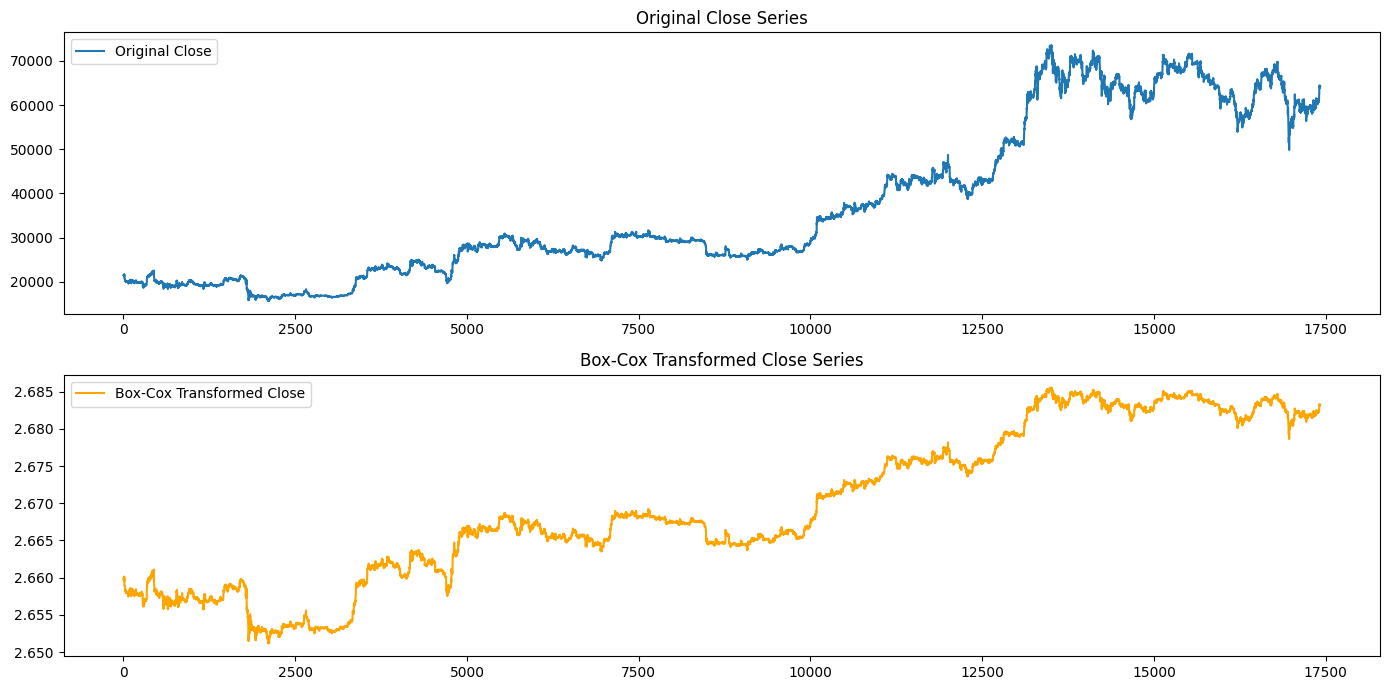

After Differencing of Box-Cox Transformed Series:
KPSS Statistic: 0.0941600294268203
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Data is likely stationary.


C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\35180152.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


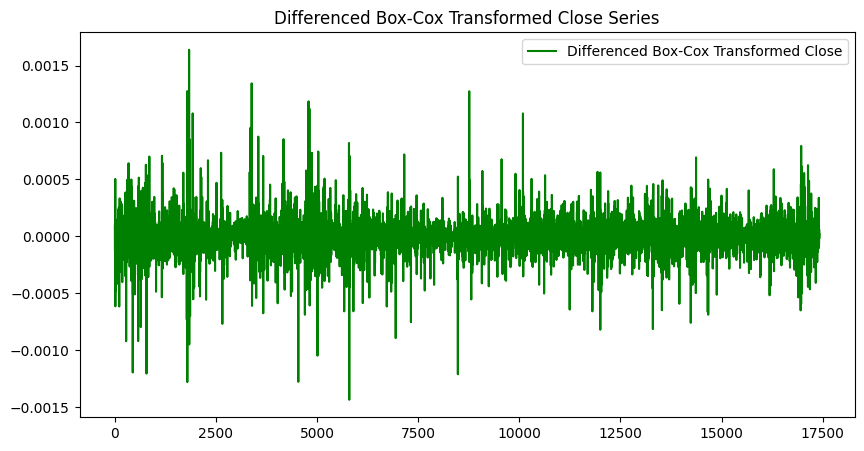

In [3]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import kpss

# Ensure data is positive for Box-Cox
df['Close'] = df['Close'].replace(0, np.nan).fillna(method='ffill').fillna(method='bfill')

# Check stationarity using KPSS test
def check_stationarity_kpss(series):
    result = kpss(series.dropna(), regression='c')
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[3])
    if result[1] < 0.05:
        print("Data is likely non-stationary.")
    else:
        print("Data is likely stationary.")

# Check stationarity of the 'Close' series before transformation
print("Before Box-Cox Transformation:")
check_stationarity_kpss(df['Close'])

# Apply Box-Cox transformation
df['Close_BoxCox'], lambda_param = boxcox(df['Close'])

# Check stationarity of the transformed 'Close' series
print("\nAfter Box-Cox Transformation:")
check_stationarity_kpss(df['Close_BoxCox'])

# Plot the original and transformed series
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Original Close')
plt.title('Original Close Series')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Close_BoxCox'], label='Box-Cox Transformed Close', color='orange')
plt.title('Box-Cox Transformed Close Series')
plt.legend()

plt.tight_layout()
plt.show()


# Apply differencing
df['Close_BoxCox_Diff'] = df['Close_BoxCox'].diff().dropna()

# Check stationarity of the differenced series
print("After Differencing of Box-Cox Transformed Series:")
check_stationarity_kpss(df['Close_BoxCox_Diff'].dropna())

# Plot the differenced series
plt.figure(figsize=(10, 5))
plt.plot(df['Close_BoxCox_Diff'], label='Differenced Box-Cox Transformed Close', color='green')
plt.title('Differenced Box-Cox Transformed Close Series')
plt.legend()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_combined_dataset.csv', index_col='Date', parse_dates=True)

# Select only the 'Close' column for Bitcoin
btc_close = df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc_close)

# Define a function to create sequences of data
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

# Create sequences
seq_length = 60
x, y = create_sequences(btc_scaled, seq_length)

# Split the data into training and testing sets
train_size = int(len(x) * 0.8)
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

The model is a sequential neural network with a Bidirectional LSTM layer followed by two stacked LSTM layers, each with 50 units, and Dropout for regularization, optimized using Adam with a learning rate of 0.001 to predict a single value from a sequence of 10 time steps and 14 features.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

def build_improved_lstm_model(input_shape):
    model = Sequential()

    # Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=input_shape)))
    model.add(Dropout(0.2))

    # Stacked LSTM layers
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model


look_back = 10  # Number of previous time steps to use for predicting the next time step
num_features = 14  # Number of features in your input data

# Assuming X_train and y_train are prepared
model = build_improved_lstm_model(input_shape=(look_back, num_features))
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 2/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 5.9253e-05 - val_loss: 0.0024
Epoch 3/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.9185e-05 - val_loss: 0.0025
Epoch 4/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 4.2094e-05 - val_loss: 0.0012
Epoch 5/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 3.8476e-05 - val_loss: 0.0053
Epoch 6/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.7627e-05 - val_loss: 0.0021
Epoch 7/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.6161e-05 - val_loss: 0.0028
Epoch 8/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 2.8991e-05 - val_loss: 0.0014
Epoch 9/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 3.2769e-05 - val_loss: 0.0019
Epoch 10/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 3.6244e-05 - val_loss: 0.0039
Epoch 11/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 3.4449e-05 - val_loss: 9.8054e-04
Epoc

In [ ]:
model.save('lstm_btc_V2.h5')

In [5]:
from tensorflow.keras.models import load_model

model = load_model('D:\Crypto\models\lstm_btc_V2.h5')
# Assuming X_test and y_test are prepared
y_pred = model.predict(x_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f'RMSE: {rmse}')


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE: ',mean_absolute_error(y_pred,y_test))

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Sarrang\AppData\Local\Temp\ipykernel_16920\329581112.py:3: SyntaxWarning: invalid escape sequence '\C'
  model = load_model('D:\Crypto\models\lstm_btc_V2.h5')


109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
RMSE: 0.10320070850566071
MSE: 0.010650386236070352
MAE:  0.09880952832911505


Using the R² score in time series forecasting is problematic because it assumes independent residuals and fails to account for the temporal dependencies inherent in time series data. This can lead to misleading evaluations, especially in the presence of trends or seasonality, where R² might inflate perceived performance by capturing trends rather than true forecast accuracy. Additionally, R² doesn’t consider autocorrelation or the sequential nature of data, making it less informative than forecast-specific metrics like MAE, RMSE, or MAPE, which directly measure prediction errors while respecting the temporal structure of the data.